This notebook analyizes corrective submovements made during the random target pursuit task in order to develop a good way for identifying them, in order to ultimately relate the submovements to the LFADS inputs.

In [1]:
# Imports and constants
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, 'src')
from utils import get_indices
import kinematics_and_input as ki
import h5py
import importlib
importlib.reload(sys.modules['kinematics_and_input'])
from IPython.display import HTML, display

trial_type = 'all'

lfads_filename = "/home/pmalonis/lfads_analysis/data/model_output/rockstar_8QTVEk_%s.h5"%trial_type
data_filename = "/home/pmalonis/lfads_analysis/data/intermediate/rockstar.p"
inputInfo_filename = "/home/pmalonis/lfads_analysis/data/model_output/rockstar_inputInfo.mat"
raw_filename = "/home/pmalonis/lfads_analysis/data/raw/rockstar.mat"

In [2]:
#Loading data
df = pd.read_pickle(data_filename)
mat_data = loadmat(raw_filename)
input_info = loadmat(inputInfo_filename)
used_inds = get_indices(input_info, trial_type)

In [10]:
%%capture
%matplotlib inline
mpl.rcParams['animation.embed_limit'] = 100
import kinematics_and_input as ki
importlib.reload(ki)
playback_ratio = .2
read_fps = 200
#Creating trial animation
with h5py.File(lfads_filename) as h5file:
    trial_len_ms = input_info['seq_timeVector'][-1][-1]
    dt = np.round(trial_len_ms/h5file['controller_outputs'].shape[1])/1000 
    #Converting trial length and round to nearest dt
    trial_len = trial_len_ms/1000
    trial_len = np.floor(trial_len/dt)*dt
    lfads_t = np.arange(0, trial_len, dt)
    for i, trial_idx in enumerate(used_inds[20:21]):
        data_t = df.loc[trial_idx].loc[:trial_len].index.values
        x = df.loc[trial_idx].loc[:trial_len].kinematic['x'].values
        y = df.loc[trial_idx].loc[:trial_len].kinematic['y'].values
        x_vel = df.loc[trial_idx].loc[:trial_len].kinematic['x_vel'].values
        y_vel = df.loc[trial_idx].loc[:trial_len].kinematic['y_vel'].values
        speed = np.sqrt(x_vel**2 + y_vel**2)
        title = plt.title('trial%03d'%trial_idx)
        #scroll_data = np.reshape(speed, (1, len(speed)))
        scroll_data = h5file['controller_outputs'][i,:,:].T
        anim,frames = ki.animate_trial(mat_data, trial_idx, scroll_data, 0.01, title, fps=read_fps)

display(HTML(anim.to_jshtml(fps=read_fps*playback_ratio)))

In [9]:
display(HTML(anim.to_jshtml(fps=read_fps*playback_ratio)))

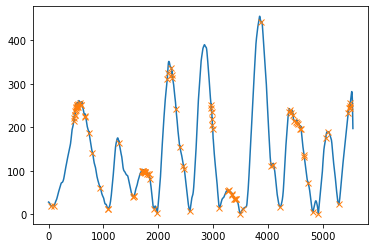

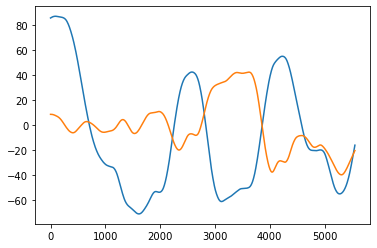

In [7]:
from scipy.signal import find_peaks, butter, sosfilt

peaks,_= find_peaks(-speed)
plt.plot(speed)
plt.plot(peaks, speed[peaks], 'x')
plt.figure()
plt.plot(x)
plt.plot(y)

In [ ]:
sos = butter(3, 20, fs=1000, output='sos')
x_vel_filt = sosfilt(sos, x_vel)
y_vel_filt = sosfilt(sos, y_vel)
filtered_speed = np.sqrt(x_vel_filt**2 + y_vel_filt**2)
filtered_speed = sosfilt(sos, speed)
fp, _ = find_peaks(-filtered_speed, width=50)
plt.plot(filtered_speed)
plt.plot(fp, filtered_speed[fp], 'x')

In [ ]:
df.loc[trial_idx]

In [ ]:
print(len(frames))
print(read_fps*playback_ratio)

In [ ]:
966/250

In [9]:
anims

NameError: name 'anims' is not defined

In [14]:
trial_idx

100